In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import factor_analyzer

In [128]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('./data.csv')
print(df.describe())

        education        income       women    prestige       census
count  102.000000    102.000000  102.000000  102.000000   102.000000
mean    10.738039   6797.901961   28.979020   46.833333  5401.774510
std      2.728444   4245.922227   31.724931   17.204486  2644.993215
min      6.380000    611.000000    0.000000   14.800000  1113.000000
25%      8.445000   4106.000000    3.592500   35.225000  3120.500000
50%     10.540000   5930.500000   13.600000   43.600000  5135.000000
75%     12.647500   8187.250000   52.202500   59.275000  8312.500000
max     15.970000  25879.000000   97.510000   87.200000  9517.000000


In [129]:
# Отбор количественных признаков
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
df_num = df[num_features]

/Users/malinatrash/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/malinatrash/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/malinatrash/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/malinatrash/opt/anaconda3/lib/python3.9/site-packages/

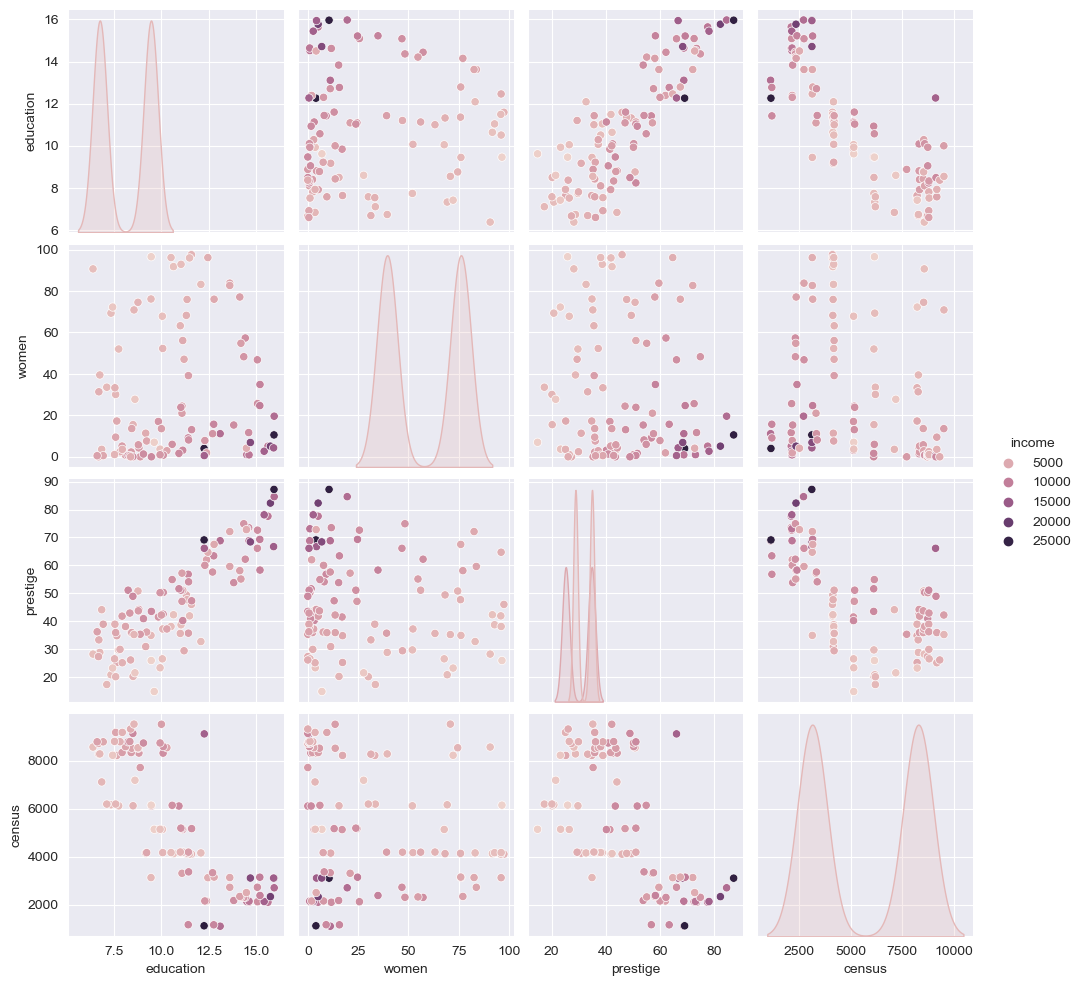

In [130]:
sns.pairplot(df,hue='income',diag_kws={'bw':0.2})
plt.show()

In [131]:
Segment = df.pop('income')
scaler = StandardScaler()
df_t = pd.DataFrame(scaler.fit_transform(df_num))

df_t.describe()

,0,1,2,3,4
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,3.374207e-17,-1.044916e-16,3.787820e-16,-6.530724e-17,2.808211e-16
std,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00
min,-1.605149e+00,-1.464336e+00,-9.179571e-01,-1.871112e+00,-1.629476e+00
25%,-8.445703e-01,-6.371279e-01,-8.041589e-01,-6.780591e-01,-8.667471e-01
50%,-7.294164e-02,-2.052994e-01,-4.871552e-01,-1.888636e-01,-1.013583e-01
75%,7.032910e-01,3.288353e-01,7.356412e-01,7.267353e-01,1.105901e+00
max,1.927031e+00,4.516175e+00,2.170829e+00,2.357874e+00,1.563538e+00


           education     women  prestige    census
education   1.000000  0.061853  0.850177 -0.823088
women       0.061853  1.000000 -0.118334 -0.227003
prestige    0.850177 -0.118334  1.000000 -0.634510
census     -0.823088 -0.227003 -0.634510  1.000000


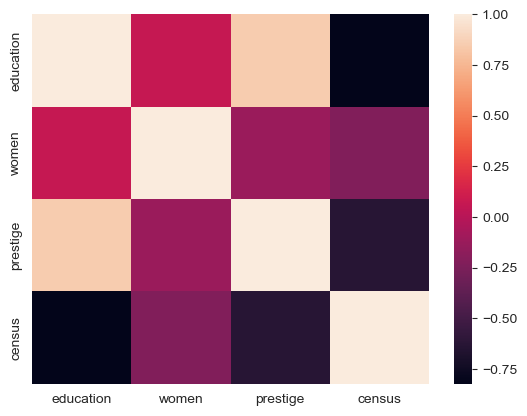

In [132]:
print(df.corr())
sns.heatmap(df.corr())
plt.show()

In [133]:
# Снижение размерности с помощью PCA
pca = PCA()
pca.fit(df_t)
pca_var = pca.explained_variance_ratio_
cumsum_var = np.cumsum(pca_var)
n_components = np.argmax(cumsum_var >= 0.8) + 1

print('Количество главных компонент:', n_components)

Количество главных компонент: 2


[0.60217628 0.27273107 0.06557106 0.04144626 0.01807534]


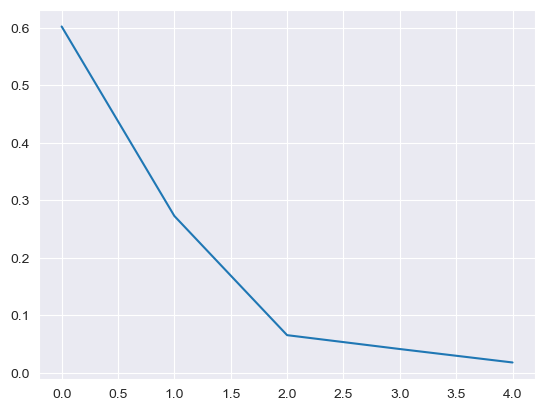

In [134]:
pca = PCA(n_components=5)
pc = pca.fit_transform(df_t)
v = pca.explained_variance_ratio_
print(v)
plt.plot(range(0, df_t.shape[1]), v)
plt.show()

[0.60217628 0.27273107]


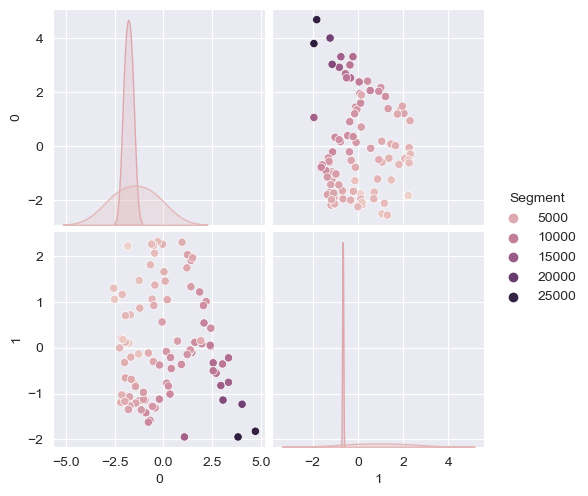

In [135]:
pca = PCA(n_components=n_components)
pc = pca.fit_transform(df_t)
pc=pd.DataFrame(pc)
pc['Segment'] = Segment
sns.pairplot(pc, hue='Segment')
v=pca.explained_variance_ratio_
print(v)
plt.show()

Матрица нагрузок (без вращения):
 [[ 0.93008523 -0.19679714 -0.00326469]
 [ 0.7318298   0.52528262 -0.08853174]
 [-0.08241875 -0.70569649  0.11358166]
 [ 0.93648349  0.10141789  0.26783796]
 [-0.78912928  0.44925231  0.22003742]]


Матрица общностей (без вращения):
 [0.90379831 0.81933455 0.51770118 0.9590241  0.87296913]




Матрица нагрузок (с вращением):
 [[ 0.76418652  0.56158353  0.06664244]
 [ 0.37148777  0.44010531  0.69831133]
 [ 0.16470055 -0.03094584 -0.69972656]
 [ 0.50002086  0.80366004  0.25126435]
 [-0.88144605 -0.28156383  0.12939783]]


Матрица общностей (с вращением):
 [0.90379831 0.81933455 0.51770118 0.9590241  0.87296913]


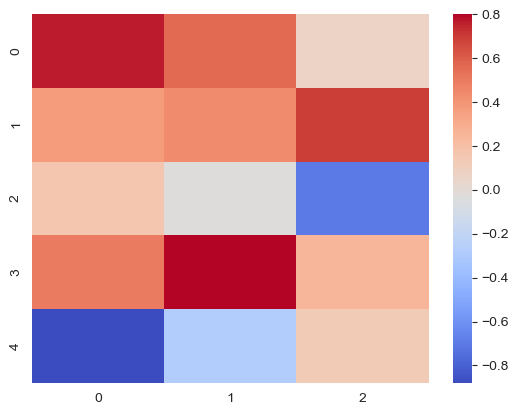

In [149]:
# Факторный анализ без вращения
fa = factor_analyzer.FactorAnalyzer(n_factors=3, rotation=None)
fa.fit(df_t)
print('Матрица нагрузок (без вращения):\n', fa.loadings_)
print('\n')
print('Матрица общностей (без вращения):\n', fa.get_communalities())
print('\n\n\n')

# Факторный анализ с вращением
fa = factor_analyzer.FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(df_t)
print('Матрица нагрузок (с вращением):\n', fa.loadings_)
print('\n')
print('Матрица общностей (с вращением):\n', fa.get_communalities())

# Сравнение результатов
sns.heatmap(fa.loadings_, cmap='coolwarm')
plt.show()

In [ ]:
fa=factor_analyzer.FactorAnalyzer(n_factors=3, rotation=None)
scaler = StandardScaler()
aps_reduced=scaler.fit_transform(df_t)
fa.fit(aps_reduced)
loads=fa.loadings_
print(loads)
print(fa.get_communalities())
print('\n\n\n')
print(fa.get_uniquenesses())

In [138]:
fa = factor_analyzer.FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(df_t)
loads=fa.loadings_
print(loads)
print(fa.get_communalities())
print('\n\n\n')
print(fa.get_uniquenesses())

[[ 0.76418652  0.56158353  0.06664244]
 [ 0.37148777  0.44010531  0.69831133]
 [ 0.16470055 -0.03094584 -0.69972656]
 [ 0.50002086  0.80366004  0.25126435]
 [-0.88144605 -0.28156383  0.12939783]]
[0.90379831 0.81933455 0.51770118 0.9590241  0.87296913]




[0.09620169 0.18066545 0.48229882 0.0409759  0.12703087]
